# TASK 2: World Cup 2022
With Euros underway, it is a repetitive task for the team to produce insights around the
importance of sporting events in Ads. Using the attached data, feel free to generate any insights
you think is relevant around what we have seen at the World Cup in 2022 & how this could be
interesting, below are some hints to help you get started
- Q1: Which countries have the largest reduction in Cost per Acquistion (CPA) for different
conversions during the World Cup compared to other date ranges available?
- Q2: What insights could you present which clients might find interesting & encourage them to
spend more on the next major sporting event?
- Q3: Euro 2024 is currently underway; how could you adapt your analysis for this competition
instead? Are there any insights or questions that would be more or less relevant?

## Columns meanings
- Data set has 659.849 rows and 12 columns:
1. date_partition: date of data recording
2. hour_of_day_utc: Hour when data was recorded (UTC) Coordinated Universal Time. Range 0-23.
3. country_code: origin country of data in ISO standard. Range 2 letter code
4. os_name: operating system of the device used. Android, iOS, Windows.
5. platform_type: type of platform . website, mobile app.
6. imps: Number of ad impressions. How many times the ad was fetched and shown independent of user interaction.
7. viewable_imps: Number of viewable ad impressions. Ads actually viewed according to 50% in 1second standard.
8. clicks: Number of ad clicks. (interaction measure)
9. reg_fin: finalized registrations. Number of users who registered after clicking.
10. ftd: first-time deposits. Number of users who made their first deposit after clicking. (Users need to deposit funds to use the service)
11. deposit: Total amount deposited by users. Cummulative value per UTC hour (probably).
12. spend_usd: Total ad spend in US dollars. Cost of displaying the ads.

Therefore, this data set contain data points for online marketing campaigns metrics and can be use to calculate further digital marketing KPIs (key performance indicators)


## Definitions
- <b>Viewable impressions</b>: is a standard measure of ad viewability defined by the International Advertising Bureau (IAB) to be an ad, which appears at least 50% on screen for more than one second. They are the metric that advertisers use to <b>quantify the percentage of ads that are actually viewed</b> by real people.
- <b>First-time deposit (FTD)</b>: conversion is a widely used acquisition metric in the online gambling industry. It is normally calculated by dividing the number unique visitors by the number of first time deposits. The value of the first time deposit and second deposit (if there is one) is a strong indication of the potential life time value of a customer.


In [112]:
# uncomment to reset to default number the rows shown
# pd.reset_option('display.max_rows')

# Data Inspection 

In [1]:
import pandas as pd
df = pd.read_csv('data/world_cup_data.csv')
df.head()


,date_partition,hour_of_day_utc,country_code,os_name,platform_type,imps,viewable_imps,clicks,reg_fin,ftd,deposit,spend_usd
0,2022-12-02,4,BR,Android,website,263424.0,177356.0,964.0,27.0,20.0,197.0,178.62
1,2022-12-02,14,BR,Windows,website,206976.0,160251.0,509.0,14.0,12.0,128.0,122.47
2,2022-12-02,10,DE,Android,website,5790.0,4501.0,73.0,0.0,0.0,12.0,13.41
3,2022-12-02,9,IN,Android,website,376320.0,188159.0,1437.0,1.0,2.0,10.0,220.12
4,2022-12-02,1,KE,Android,website,34737.0,14405.0,36.0,1.0,0.0,11.0,24.42


In [2]:
# 659.849 rows and 12 columns
df.shape

(659849, 12)

In [3]:
# summary of dataframe, check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659849 entries, 0 to 659848
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date_partition   659849 non-null  object 
 1   hour_of_day_utc  659849 non-null  int64  
 2   country_code     659466 non-null  object 
 3   os_name          658339 non-null  object 
 4   platform_type    659849 non-null  object 
 5   imps             659849 non-null  float64
 6   viewable_imps    659849 non-null  float64
 7   clicks           659849 non-null  float64
 8   reg_fin          659849 non-null  float64
 9   ftd              659849 non-null  float64
 10  deposit          659849 non-null  float64
 11  spend_usd        659849 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 60.4+ MB


- No missing values apparent

In [4]:
# summary statistics of numerical columns
df.describe()

,hour_of_day_utc,imps,viewable_imps,clicks,reg_fin,ftd,deposit,spend_usd
count,659849.000000,6.598490e+05,6.598490e+05,659849.000000,659849.000000,659849.000000,659849.000000,659849.000000
mean,11.726145,1.945690e+04,1.232235e+04,41.446393,1.236513,0.506079,8.604884,16.637455
std,6.821883,6.858429e+04,4.659976e+04,183.442549,10.460184,7.901057,56.606414,65.575744
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,7.350000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.390000
50%,12.000000,2.792000e+03,1.649000e+03,0.000000,0.000000,0.000000,0.000000,2.150000
75%,18.000000,1.133900e+04,6.934000e+03,21.000000,0.000000,0.000000,2.000000,10.210000
max,23.000000,1.507310e+06,1.269530e+06,6592.000000,1868.000000,2213.000000,2453.000000,4149.730000


- high variability, all numerical columns have a min 0 and low mean value.
- median  of clicks, registrations, ftd, deposit also 0.
    - implies that most records for impressions were innefective for engament.
    - investigate how many hours were recorded per date_partition
- I cannot tell if ftd and deposits are the number of deposits or monetary amounts.

In [5]:
# Inspect the categorical variables, how many unique values
df.select_dtypes('object').nunique()

date_partition    123
country_code      155
os_name            10
platform_type       2
dtype: int64

- records for 123 unique days (convert to datetime datatype)
- 155 countries 
- 10 operating systems (which ones?)
- 2 platform types

In [6]:
# convert date_partition to datetime
df['date_partition'] = pd.to_datetime(df['date_partition'])

# Get the start date (earliest date)
start_date = df['date_partition'].min()

# Get the end date (latest date)
end_date = df['date_partition'].max()

date_difference = (end_date - start_date).days

# Display the difference in days
print(f"Difference between start and end date: {date_difference} days")

# Display the start and end dates
print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Difference between start and end date: 122 days
Start date: 2022-10-01 00:00:00
End date: 2023-01-31 00:00:00


In [7]:
# double check if there are any days missing in the range

# Generate a complete date range from start_date to end_date
complete_date_range = pd.date_range(start=start_date, end=end_date)

# Identify the missing dates by comparing the complete date range with the dates in the DataFrame
present_dates = pd.to_datetime(df['date_partition'].unique())
missing_dates = complete_date_range.difference(present_dates)

# Display the missing dates
print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [8]:
# check for duplicate rows - NO duplicate records

duplicates = df.duplicated()

# Print rows that are duplicates
duplicate_rows = df[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [date_partition, hour_of_day_utc, country_code, os_name, platform_type, imps, viewable_imps, clicks, reg_fin, ftd, deposit, spend_usd]
Index: []


In [9]:
#check unique values of categorical columns
# there are nan present in country and platform

unique_country_codes = df['country_code'].unique()
unique_os_names = df['os_name'].unique()
unique_platform_types = df['platform_type'].unique()

# Display the unique values
print("Unique country codes:")
print(unique_country_codes)

print("\nUnique OS names:")
print(unique_os_names)

print("\nUnique platform types:")
print(unique_platform_types)

Unique country codes:
['BR' 'DE' 'IN' 'KE' 'AO' 'JP' 'RO' 'PT' 'NO' 'CM' 'EE' 'GB' 'UG' 'BD'
 'TH' 'FI' 'BE' 'CH' 'CI' 'ZA' 'SE' 'HR' 'RS' 'CA' 'HU' 'IT' 'AT' 'TZ'
 'AU' 'LV' 'US' 'NG' 'SK' 'PE' 'CD' 'CZ' 'CL' 'EC' 'DK' 'MZ' 'MX' 'ME'
 'ES' 'SI' 'BG' 'MW' 'PL' 'NL' 'GR' 'ID' 'NZ' 'BA' 'PK' 'IE' 'LT' 'CG'
 'GH' 'IS' 'SN' 'LR' 'VN' 'AR' 'MT' 'GT' 'PH' 'CR' 'ET' 'TD' 'NI' nan 'SD'
 'TR' 'KZ' 'RW' 'TN' 'AD' 'TW' 'LK' 'CO' 'AL' 'PY' 'UA' 'UZ' 'ZM' 'SS'
 'SG' 'MV' 'LU' 'HK' 'AZ' 'IL' 'TT' 'MY' 'BB' 'KG' 'MA' 'BY' 'LB' 'DZ'
 'PG' 'SL' 'EG' 'VE' 'BO' 'GM' 'KR' 'ML' 'AM' 'VC' 'SO' 'SV' 'XK' 'BJ'
 'MK' 'PS' 'SY' 'PR' 'FR' 'BM' 'LI' 'VG' 'GE' 'QA' 'LY' 'CN' 'MQ' 'IQ'
 'IR' 'MC' 'VA' 'JM' 'GY' 'JO' 'PF' 'MN' 'ZW' 'TL' 'AS' 'GN' 'RE' 'SA'
 'DJ' 'HN' 'HT' 'KW' 'GW' 'MM' 'KH' 'UY' 'KY' 'FO' 'BW' 'DO' 'YE' 'MD'
 'GQ']

Unique OS names:
['Android' 'Windows' 'iOS' 'OSX' 'Linux' 'ChromeOS' nan 'NetCast'
 'WindowsPhone' 'BlackBerry' 'BlackBerryTablet']

Unique platform types:
['website' 'app']


## NaN values in country_code and os_name
- 383 records with Nan country_code
- 1510 records with Nan os_name

The reason for this Nan values is unknown, but is not of consequence because they represent 0.06% and 0.25% of the dataset respectively. <br>
I think it is safe to leave the nan and ignore.

In [10]:
# Check for NaN values in 'country_code'
nan_country_code = df[df['country_code'].isna()]
#print("Rows with NaN in 'country_code':")
#print(nan_country_code)

# Check for NaN values in 'os_name'
nan_os_name = df[df['os_name'].isna()]
#print("\nRows with NaN in 'os_name':")
#print(nan_os_name)

## Data set is clean, no missing values, no duplicates, but some inconsistencies
- for example: row 21, How is it possible to have 0 impressions, 916 viewable and 12 clicks?


- add column with country names from wikipedia country codes data set

In [11]:
countries = pd.read_csv('data/wikipedia-iso-country-codes.csv',usecols=['English short name lower case', 'Alpha-2 code'])
countries = countries[['English short name lower case', 'Alpha-2 code']].rename(columns={'English short name lower case': 'country'})
countries.head()

,country,Alpha-2 code
0,Zimbabwe,ZW
1,Zambia,ZM
2,Yemen,YE
3,Western Sahara,EH
4,Wallis and Futuna,WF


In [12]:
# Merge DataFrames based on country_code and Alpha-2 code to add 'country' column to df
df = pd.merge(df, countries, left_on='country_code', right_on='Alpha-2 code', how='left')

df.drop(columns=['Alpha-2 code'], inplace=True)

df.head()

,date_partition,hour_of_day_utc,country_code,os_name,platform_type,imps,viewable_imps,clicks,reg_fin,ftd,deposit,spend_usd,country
0,2022-12-02,4,BR,Android,website,263424.0,177356.0,964.0,27.0,20.0,197.0,178.62,Brazil
1,2022-12-02,14,BR,Windows,website,206976.0,160251.0,509.0,14.0,12.0,128.0,122.47,Brazil
2,2022-12-02,10,DE,Android,website,5790.0,4501.0,73.0,0.0,0.0,12.0,13.41,Germany
3,2022-12-02,9,IN,Android,website,376320.0,188159.0,1437.0,1.0,2.0,10.0,220.12,India
4,2022-12-02,1,KE,Android,website,34737.0,14405.0,36.0,1.0,0.0,11.0,24.42,Kenya


# Q1: Which countries have the largest reduction in Cost per Acquistion (CPA) for different conversions during the World Cup compared to other date ranges available?

- First we need the exact dates of the world cup 2022:
    - Sun, Nov 20, 2022 – Sun, Dec 18, 2022. ('2022-11-20' - '2022-12-18')
- CPA: metric that measures the cost incurred to acquire a new customer through a marketing campaign. It helps businesses determine the financial efficiency of their marketing efforts in attracting new customers.

$$ CPA = \frac{ Total-Marketing-Cost}{Number-of-New-Customers} $$

- Marketing cost is column spend_usd
- New customers are those who completed registration (reg_fin) as possible leads.
- or first time deposit (ftd) as this customers actually resulted in a conversion.

In [114]:
# check average spend_usd per country of the entire recorded period

avg_spend_per_country = df.groupby('country')['spend_usd'].mean().sort_values(ascending=False)

# Convert to DataFrame
avg_spend_per_country_df = avg_spend_per_country.reset_index(name='average_spend_usd')

# Set display options to show all rows
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

#print(avg_spend_per_country_df)

In [14]:
# filter countries nothing was spend
countries_with_zero_spend = avg_spend_per_country_df[avg_spend_per_country_df['average_spend_usd'] == 0]

# Display countries with 0 average spend_usd
# print("Countries with average spend_usd equal to 0:")
# print(countries_with_zero_spend)
countries_with_zero_spend.shape

(20, 2)

In [17]:
# check average reg_fin per country
avg_reg_per_country = df.groupby('country')['reg_fin'].mean().sort_values(ascending=False)

avg_reg_per_country_df = avg_reg_per_country.reset_index(name='average_new_customers')

#print(avg_reg_per_country_df)

In [17]:
# filter countries with no registrations
countries_with_no_reg = avg_reg_per_country_df[avg_reg_per_country_df['average_new_customers'] == 0]

# Display countries with 0 average spend_usd
# print("Countries with avg no new reg:")
# print(countries_with_no_reg)
countries_with_no_reg.shape

(70, 2)

- there are 20 countries with 0 avg spend_usd
- there are 70 countries 0 avg reg_fin
- there should be 20 countries with 0 avg CPA because nothing was spend
- and 70 countries with nan CPA, as no division by zero. cpa is not defined if the money spend brought no new customers.

### define world cup 2022 dates and add a column to indicate if date_partition was during world cup

In [18]:
# Define the World Cup period
world_cup_start = pd.Timestamp('2022-11-20')
world_cup_end = pd.Timestamp('2022-12-18')

# Add a column to indicate whether each row is during the World Cup
df['during_world_cup'] = df['date_partition'].between(world_cup_start, world_cup_end)

In [115]:
df.sample(2)

,date_partition,hour_of_day_utc,country_code,os_name,platform_type,imps,viewable_imps,clicks,reg_fin,ftd,...,cpv,ctr,view_rate,roas,roi,ftd_view_imp,ftd_click,cost_ftd_click,cost_ftd,cpa_ftd
296833,2023-01-12,15,EC,Android,website,52124.0,41053.0,236.0,2.0,0.0,...,0.001037,0.452766,78.760264,0.070489,-0.929511,0.0,0.0,0.0,NaN,NaN
108997,2022-12-31,17,MZ,Android,website,4022.0,873.0,0.0,2.0,0.0,...,0.001592,0.000000,21.705619,0.000000,-1.000000,0.0,NaN,NaN,NaN,NaN


# Plan of action: add computed columns, then aggregate by country, worldcup dates, platform, os, or (hour of the day by top countries)
### adding columns with digital marketing KPIs
    - assuming that ftd is in number of first time deposit and deposit is a monetary amount
- CPA: cost per acquisition = spend_usd/reg_fin
- cpa_ftd = spend_usd/ftd
- CPC: cost per click = spend_usd/clicks
- CPV:cost per view = spend_usd/viewable_imps
- CTR: click through rate = imps/clicks * 100
- view_rate: Viewability Rate = viewable_imps/imps * 100
- ROAS: return on ad spend = deposit/spend_usd (revenue/cost)
- ROI: return on investment = (deposit - spend_usd) /spend_usd * 100 (profit/cost) 
- ftd_view_imp: ftd per impression viewed = ftd/viewable_imps
- ftd_click: ftd per clicks = ftd/clicks
- cost_ftd: cost of ftd = spend_usd/ftd **first time deposit conversion rates can be very low, in some case less than 1%. This means acquisition costs can run into the hundreds USD for each player.
- cost_ftd_click: cost of ftd per click = (spend_usd/clicks) * ftd/cliks

In [22]:
import numpy as np
# Add a cpa (cost per acquisition) column to the dataframe
# If reg_fin is 0, then return np.nan (CPA is not applicable)

df['cpa'] = df.apply(lambda row: row['spend_usd'] / row['reg_fin'] if row['reg_fin'] != 0 else np.nan, axis=1)

In [82]:
# cpa using first time deposit instead of registration
df['cpa_ftd'] = df.apply(lambda row: row['spend_usd'] / row['ftd'] if row['ftd'] != 0 else np.nan, axis=1)

In [27]:
# add cpc (cost per click) column
df['cpc'] = df.apply(lambda row: row['spend_usd'] / row['clicks'] if row['clicks'] != 0 else np.nan, axis=1)

In [24]:
# add cpv cost per view column
df['cpv'] = df.apply(lambda row: row['spend_usd'] / row['viewable_imps'] if row['viewable_imps'] != 0 else np.nan, axis=1)

In [42]:
# add ctr % click through rate column
df['ctr'] = df.apply(lambda row: (row['clicks'] / row['imps']) * 100 if row['imps'] != 0 else np.nan, axis=1)

In [28]:
# add view_rate (viewability rate) column percentage of impressions actually viewed
df['view_rate'] = df.apply(lambda row: (row['viewable_imps'] / row['imps']) * 100 if row['imps'] != 0 else np.nan, axis=1)

In [30]:
# add roas return on ad spend column (revenue/cost) 
# how many usd were earned for every dollar spent
df['roas'] = df.apply(lambda row: row['deposit'] / row['spend_usd'] if row['spend_usd'] != 0 else np.nan, axis=1)

In [32]:
# add roi % return on investment column 
df['roi'] = df.apply(lambda row: (row['deposit'] - row['spend_usd']) / row['spend_usd'] if row['spend_usd'] != 0 else np.nan, axis=1)
                     

In [33]:
# add column ftd_view_imp how many first time deposits per number of viewable impression
  
df['ftd_view_imp'] = df.apply(lambda row: row['ftd'] / row['viewable_imps'] if row['viewable_imps'] != 0 else np.nan, axis=1)

In [34]:
# add column ftd_click 
df['ftd_click'] = df.apply(lambda row: row['ftd'] / row['clicks'] if row['clicks'] != 0 else np.nan, axis=1)

In [38]:
# add cost per ftd (how much did first time conversions cost on average)
df['cost_ftd'] = df.apply(lambda row: row['spend_usd']/row['ftd'] if row['ftd'] != 0 else np.nan, axis=1)

In [39]:
# add cost of ftd per click
df['cost_ftd_click'] = df.apply(lambda row: (row['spend_usd'] / row['clicks']) * row['ftd_click'] if row['clicks'] != 0 else np.nan, axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659849 entries, 0 to 659848
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date_partition    659849 non-null  datetime64[ns]
 1   hour_of_day_utc   659849 non-null  int64         
 2   country_code      659466 non-null  object        
 3   os_name           658339 non-null  object        
 4   platform_type     659849 non-null  object        
 5   imps              659849 non-null  float64       
 6   viewable_imps     659849 non-null  float64       
 7   clicks            659849 non-null  float64       
 8   reg_fin           659849 non-null  float64       
 9   ftd               659849 non-null  float64       
 10  deposit           659849 non-null  float64       
 11  spend_usd         659849 non-null  float64       
 12  country           659842 non-null  object        
 13  during_world_cup  659849 non-null  bool          
 14  cpa 

In [93]:
df.head(2)

,date_partition,hour_of_day_utc,country_code,os_name,platform_type,imps,viewable_imps,clicks,reg_fin,ftd,...,cpv,ctr,view_rate,roas,roi,ftd_view_imp,ftd_click,cost_ftd_click,cost_ftd,cpa_ftd
0,2022-12-02,4,BR,Android,website,263424.0,177356.0,964.0,27.0,20.0,...,0.001007,0.365950,67.327199,1.102900,0.102900,0.000113,0.020747,0.003844,8.931000,8.931000
1,2022-12-02,14,BR,Windows,website,206976.0,160251.0,509.0,14.0,12.0,...,0.000764,0.245922,77.424919,1.045154,0.045154,0.000075,0.023576,0.005673,10.205833,10.205833


# Find average KPIs per country during world cup 2022 period and outside. 

## Q1 top 10 Average CPA (cost per acquisition) per country and cpa reductions
- cpa defined as <b>spend_usd / reg_fin</b>
- acquisition defined as users who completed the registration but did not necesarily placed a first-time-deposit.
- can be considered potential leads to send promotional material

In [53]:
# Create 2 series with mean CPA per country 
# Group by country and whether it's during the World Cup

cpa_during_wc = df[df['during_world_cup']].groupby('country')['cpa'].mean()
cpa_outside_wc = df[~df['during_world_cup']].groupby('country')['cpa'].mean()

# Merge the two CPA Series into a DataFrame
cpa_comparison = pd.DataFrame({
    'cpa_during_wc': cpa_during_wc,
    'cpa_outside_wc': cpa_outside_wc
})

In [55]:
# Calculate the reduction absolute and as a percentage in CPA and add columns to cpa_comparison
# absolute reduction in CPA
cpa_comparison['cpa_reduction'] = cpa_comparison['cpa_outside_wc'] - cpa_comparison['cpa_during_wc']

# percentage reduction and add it as a new column
cpa_comparison['cpa_reduction_pct'] = ((cpa_comparison['cpa_reduction'] / cpa_comparison['cpa_outside_wc']) * 100).round(2)

# Sort by the largest reduction in percentage
cpa_comparison_sorted = cpa_comparison.sort_values(by='cpa_reduction_pct', ascending=False)

# Display the top countries with the largest reduction in CPA
print("Countries with the largest reduction in CPA % during the World Cup:")
#cpa_comparison_sorted.head(10)

Countries with the largest reduction in CPA % during the World Cup:


,cpa_during_wc,cpa_outside_wc,cpa_reduction,cpa_reduction_pct
country,,,,
Turkey,0.000000,0.112000,0.112000,100.00
Bulgaria,0.110000,4.475162,4.365162,97.54
Guatemala,0.527857,2.681250,2.153393,80.31
Ethiopia,1.240791,5.927417,4.686626,79.07
Peru,5.330696,13.345589,8.014893,60.06
Argentina,0.098000,0.188095,0.090095,47.90
Bosnia and Herzegovina,5.594882,10.486663,4.891782,46.65
Chile,10.676972,17.866424,7.189451,40.24
Iceland,1.259765,2.004425,0.744660,37.15


In [65]:
# import plotting library
import matplotlib.pyplot as plt


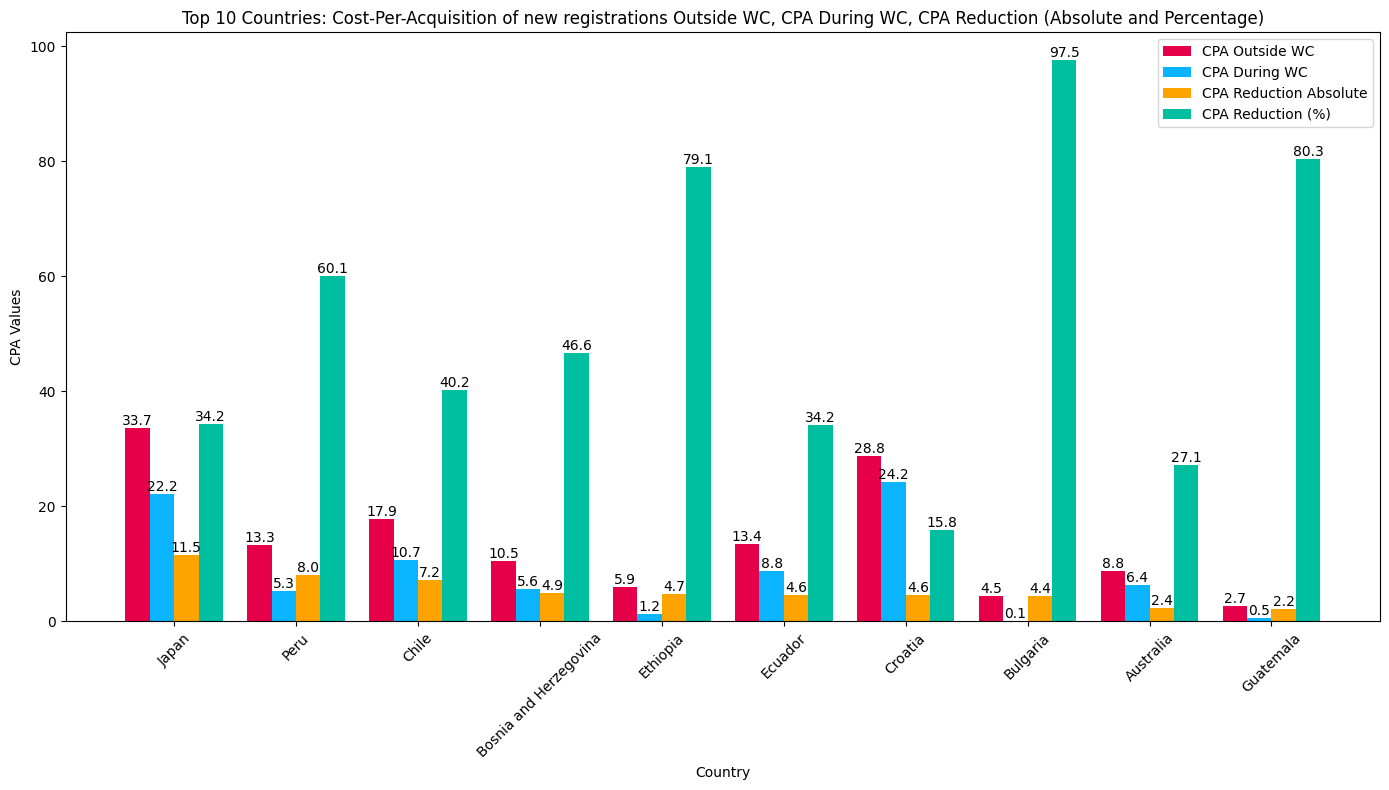

In [116]:
# Select the top 10 countries based on the highest absolute CPA reduction
top_10_reduction_absolute = cpa_comparison.nlargest(10, 'cpa_reduction')

# Plotting grouped bar charts
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
index = np.arange(len(top_10_reduction_absolute))

# Bar plots for 4 columns of cpa_comparison
bar1 = ax.bar(index, top_10_reduction_absolute['cpa_outside_wc'], bar_width, label='CPA Outside WC', color="#e60049")
bar2 = ax.bar(index + bar_width, top_10_reduction_absolute['cpa_during_wc'], bar_width, label='CPA During WC', color="#0bb4ff")
bar3 = ax.bar(index + 2 * bar_width, top_10_reduction_absolute['cpa_reduction'], bar_width, label='CPA Reduction Absolute', color="#ffa300")
bar4 = ax.bar(index + 3 * bar_width, top_10_reduction_absolute['cpa_reduction_pct'], bar_width, label='CPA Reduction (%)', color="#00bfa0")

# Adding labels to bars with 1 decimal
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Labels and title
ax.set_xlabel('Country')
ax.set_ylabel('CPA Values')
ax.set_title('Top 10 Countries: Cost-Per-Acquisition of new registrations Outside WC, CPA During WC, CPA Reduction (Absolute and Percentage)')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(top_10_reduction_absolute.index, rotation=45)
ax.legend()

plt.tight_layout()

plt.savefig('graphs/to10_cpa_absolute_bar.jpg', dpi=100, bbox_inches='tight')
plt.show()

## Insight
- In absolute terms Japan has the largest reduction of cost per acquisition during the world cup 2022 period. With a 34.2% reduction compared to non-world cup period.
- However, is worth noting that Bulgaria saw a 97.5% Reduction in CPA, during the same period.

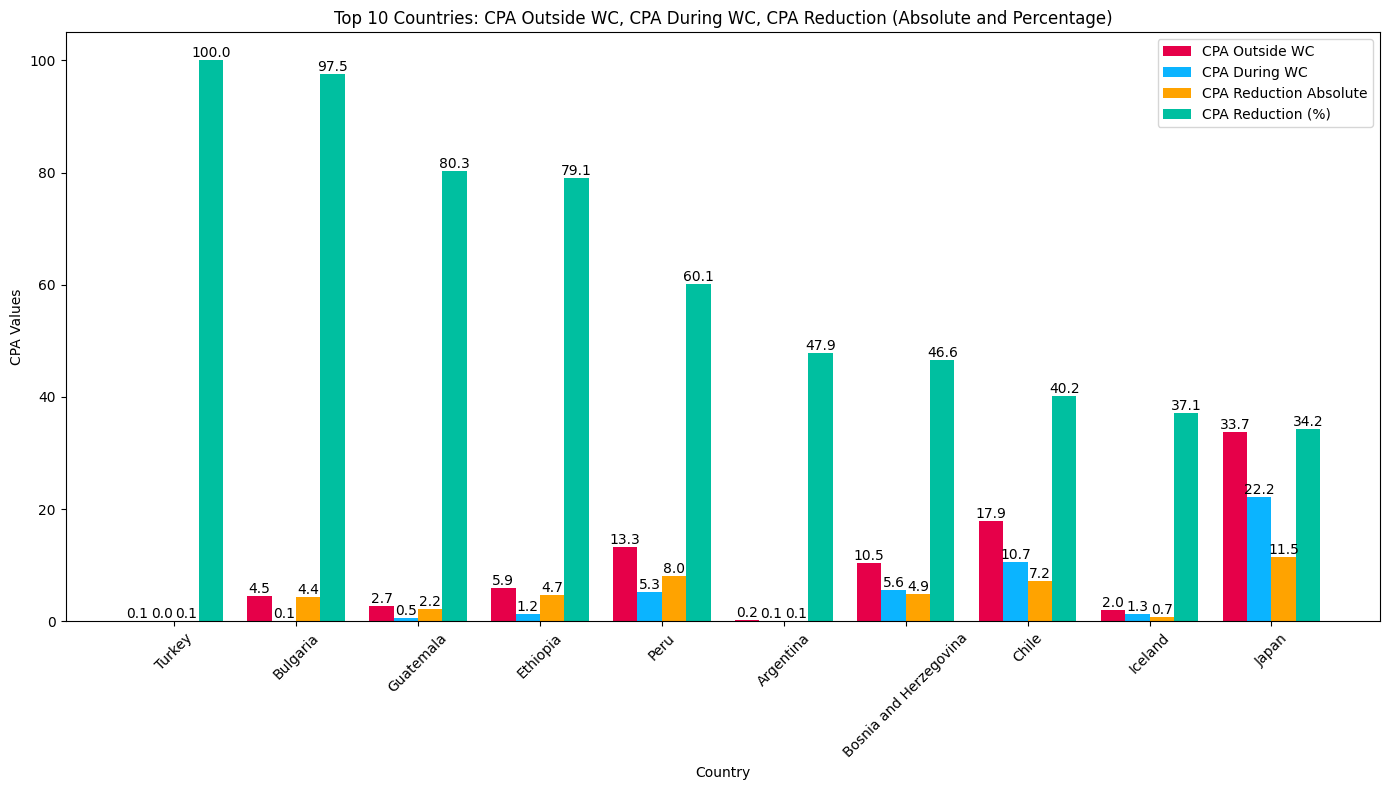

In [81]:
# Select the top 10 countries based on the highest CPA reduction percentage
top_10_reduction_percentage = cpa_comparison.nlargest(10, 'cpa_reduction_pct')

# Plotting grouped bar charts
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
index = np.arange(len(top_10_reduction_percentage))

# Bar plots for 4 columns of cpa_comparison
bar1 = ax.bar(index, top_10_reduction_percentage['cpa_outside_wc'], bar_width, label='CPA Outside WC', color="#e60049")
bar2 = ax.bar(index + bar_width, top_10_reduction_percentage['cpa_during_wc'], bar_width, label='CPA During WC', color="#0bb4ff")
bar3 = ax.bar(index + 2 * bar_width, top_10_reduction_percentage['cpa_reduction'], bar_width, label='CPA Reduction Absolute', color="#ffa300")
bar4 = ax.bar(index + 3 * bar_width, top_10_reduction_percentage['cpa_reduction_pct'], bar_width, label='CPA Reduction (%)', color="#00bfa0")

# Adding labels to bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Labels and title
ax.set_xlabel('Country')
ax.set_ylabel('CPA Values')
ax.set_title('Top 10 Countries: CPA Outside WC, CPA During WC, CPA Reduction (Absolute and Percentage)')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(top_10_reduction_percentage.index, rotation=45)
ax.legend()

plt.tight_layout()

plt.savefig('graphs/top10_cpa_pct_bar.jpg', dpi=100, bbox_inches='tight')
plt.show()

#### Try CPA using ftd to compare
- Cost per acquisition if there was actually a first time deposit (represents a real conversion)
- cpa_ftd = spend_usd/ftd

In [84]:
cpa_ftd_during_wc = df[df['during_world_cup']].groupby('country')['cpa_ftd'].mean()
cpa_ftd_outside_wc = df[~df['during_world_cup']].groupby('country')['cpa_ftd'].mean()

# Merge into a DataFrame
cpa_ftd_comparison = pd.DataFrame({
    'cpa_ftd_during_wc': cpa_ftd_during_wc,
    'cpa_ftd_outside_wc': cpa_ftd_outside_wc
})

In [89]:
# Calculate the reduction absolute and as a percentage in CPA_ftd and add columns to cpa_comparison
# absolute reduction in CPA
cpa_ftd_comparison['cpa_reduction'] = cpa_ftd_comparison['cpa_ftd_outside_wc'] - cpa_ftd_comparison['cpa_ftd_during_wc']

# percentage reduction and add it as a new column
cpa_ftd_comparison['cpa_reduction_pct'] = ((cpa_ftd_comparison['cpa_reduction'] / cpa_ftd_comparison['cpa_ftd_outside_wc']) * 100).round(2)

# Sort by the largest reduction in percentage
cpa_ftd_comparison_sorted = cpa_ftd_comparison.sort_values(by='cpa_reduction', ascending=False)

# Display the top countries with the largest reduction in CPA
print("Countries with the largest reduction in CPA_ftd during the World Cup:")
cpa_ftd_comparison_sorted.head(10)

Countries with the largest reduction in CPA_ftd during the World Cup:


,cpa_ftd_during_wc,cpa_ftd_outside_wc,cpa_reduction,cpa_reduction_pct
country,,,,
Nigeria,0.000000,20.200399,20.200399,100.00
Chile,12.678386,21.063746,8.385360,39.81
Bulgaria,0.580000,5.697783,5.117783,89.82
Guatemala,0.000000,4.606667,4.606667,100.00
Australia,5.878657,9.611895,3.733238,38.84
Peru,14.698209,18.060164,3.361955,18.62
Ethiopia,0.995000,4.236667,3.241667,76.51
Mexico,1.876250,4.304839,2.428589,56.42
Montenegro,6.067715,8.251756,2.184041,26.47


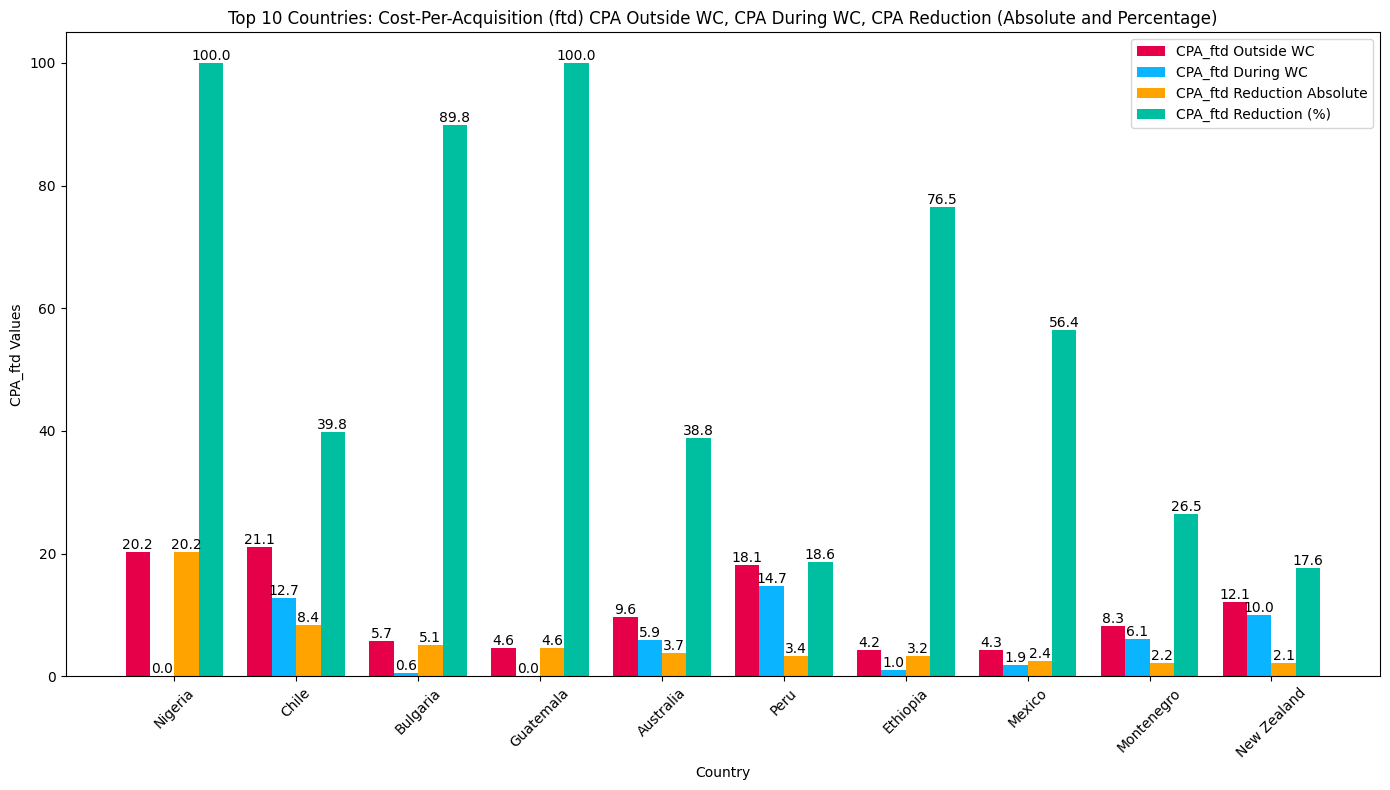

In [92]:
# Select the top 10 countries based on the highest absolute CPA reduction
top_10_reduction_cpa_ftd = cpa_ftd_comparison.nlargest(10, 'cpa_reduction')

# Plotting grouped bar charts
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
index = np.arange(len(top_10_reduction_cpa_ftd))

# Bar plots for 4 columns of cpa_comparison
bar1 = ax.bar(index, top_10_reduction_cpa_ftd['cpa_ftd_outside_wc'], bar_width, label='CPA_ftd Outside WC', color="#e60049")
bar2 = ax.bar(index + bar_width, top_10_reduction_cpa_ftd['cpa_ftd_during_wc'], bar_width, label='CPA_ftd During WC', color="#0bb4ff")
bar3 = ax.bar(index + 2 * bar_width, top_10_reduction_cpa_ftd['cpa_reduction'], bar_width, label='CPA_ftd Reduction Absolute', color="#ffa300")
bar4 = ax.bar(index + 3 * bar_width, top_10_reduction_cpa_ftd['cpa_reduction_pct'], bar_width, label='CPA_ftd Reduction (%)', color="#00bfa0")

# Adding labels to bars with 1 decimal
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Labels and title
ax.set_xlabel('Country')
ax.set_ylabel('CPA_ftd Values')
ax.set_title('Top 10 Countries: Cost-Per-Acquisition (ftd) CPA Outside WC, CPA During WC, CPA Reduction (Absolute and Percentage)')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(top_10_reduction_cpa_ftd.index, rotation=45)
ax.legend()

plt.tight_layout()

plt.savefig('graphs/to10_cpa_ftd_absolute_bar.jpg', dpi=100, bbox_inches='tight')
plt.show()

## System works, lets do a function that automates de KPIs comparisons dataframes creation and graphs.

In [130]:
import pandas as pd
import numpy as np

# for metrics decrease (cost)
def create_comparison_dataframe_down(df, metric, during_wc_col='during_world_cup', country_col='country'):
    # Group by country and whether it's during the World Cup
    metric_during_wc = df[df[during_wc_col]].groupby(country_col)[metric].mean()
    metric_outside_wc = df[~df[during_wc_col]].groupby(country_col)[metric].mean()
    
    # Merge the two Series into a DataFrame
    comparison = pd.DataFrame({
        f'{metric}_during_wc': metric_during_wc,
        f'{metric}_outside_wc': metric_outside_wc
    })

    # Calculate the absolute change
    comparison[f'{metric}_change'] = comparison[f'{metric}_outside_wc'] - comparison[f'{metric}_during_wc']
    
    # Calculate the percentage change, handling division by zero
    comparison[f'{metric}_change_pct'] = comparison.apply(lambda row: np.nan if row[f'{metric}_outside_wc'] == 0 else ((row[f'{metric}_change'] / row[f'{metric}_outside_wc']) * 100).round(2), axis=1)

    # Sort by the largest reduction 
    comparison = comparison.sort_values(by=f'{metric}_change', ascending=False)

    return comparison

# for metric increase (revenue)
def create_comparison_dataframe_up(df, metric, during_wc_col='during_world_cup', country_col='country'):
    # Group by country and whether it's during the World Cup
    metric_during_wc = df[df[during_wc_col]].groupby(country_col)[metric].mean()
    metric_outside_wc = df[~df[during_wc_col]].groupby(country_col)[metric].mean()
    
    # Merge the two Series into a DataFrame
    comparison = pd.DataFrame({
        f'{metric}_during_wc': metric_during_wc,
        f'{metric}_outside_wc': metric_outside_wc
    })

    # Calculate the absolute change * when during value was higher than outside
    comparison[f'{metric}_change'] = comparison[f'{metric}_during_wc'] - comparison[f'{metric}_outside_wc']
    
    # Calculate the percentage change, handling division by zero
    comparison[f'{metric}_change_pct'] = comparison.apply(lambda row: np.nan if row[f'{metric}_outside_wc'] == 0 else ((row[f'{metric}_change'] / row[f'{metric}_outside_wc']) * 100).round(2), axis=1)

    # Sort by the largest reduction 
    comparison = comparison.sort_values(by=f'{metric}_change', ascending=False)

    return comparison

## Create comparison dataframes for all average KPIs during and outside worldcup period grouped by country
- cpa is already done above

In [162]:
# cost per acquisition (based on registration)
cpa_comparison_df = create_comparison_dataframe_down(df, 'cpa')

# cost per acquisition (based on registration)
cpa_ftd_comparison_df = cpa__ftd_comparison_df = create_comparison_dataframe_down(df, 'cpa_ftd')

# cost per click (want reduction)
cpc_comparison_df = create_comparison_dataframe_down(df, 'cpc')

# cost per view (reduction)
cpv_comparison_df = create_comparison_dataframe_down(df, 'cpv')

# click through rate (increment)
ctr_comparison_df = create_comparison_dataframe_up(df, 'ctr')

# viewability rate (increment)
view_rate_comparison_df = create_comparison_dataframe_up(df, 'view_rate')

# return on ad spent (increment) revenue
roas_comparison_df = create_comparison_dataframe_up(df, 'roas')

# return on investment (increment) profit in %
roi_comparison_df = create_comparison_dataframe_up(df, 'roi')

# first time deposit per viewable impression (increment) ** real new customers
ftd_view_imp_comparison_df = create_comparison_dataframe_up(df, 'ftd_view_imp')

# first time deposit per click (increment)
ftd_click_comparison_df = create_comparison_dataframe_up(df, 'ftd_click')

# cost per first time deposit (reduction)
cost_ftd_comparison_df = create_comparison_dataframe_down(df, 'cost_ftd')

# cost of first time deposit per click (reduction)
cost_ftd_click_comparison_df = create_comparison_dataframe_down(df, 'cost_ftd_click')

KeyError: 'during_world_cup'

In [133]:
#ctr_comparison_df.head()

,ctr_during_wc,ctr_outside_wc,ctr_change,ctr_change_pct
country,,,,
Indonesia,1.074939,0.570311,0.504628,88.48
Nicaragua,0.170889,0.000000,0.170889,NaN
Philippines,0.406757,0.240800,0.165957,68.92
Congo (Brazzaville),0.414660,0.313696,0.100964,32.19
Algeria,0.098765,0.000000,0.098765,NaN


### Define a function that takes in a comparison dataframe and plots the absolute values and change during world cup

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_top_10_comparison_absolut_change(df, metric):
    """
    Generate a grouped bar chart for the top 10 countries based on the highest change metric reduction.
    
    Parameters:
    - df (DataFrame): DataFrame containing columns for the metric during and outside WC, absolute reduction, and percentage change.
    - metric (str): Name of the metric (e.g., 'cpc', 'ctr') to analyze and plot.
    """
    # Select the top 10 countries based on the highest absolut change metric reduction
    top_10_reduction_metric = df.nlargest(10, f'{metric}_change')

    # Plotting grouped bar charts
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.2
    index = np.arange(len(top_10_reduction_metric))

    # Bar plots for 4 columns of df
    bar1 = ax.bar(index, top_10_reduction_metric[f'{metric}_outside_wc'], bar_width, label=f'{metric.capitalize()} Outside WC', color="#e60049")
    bar2 = ax.bar(index + bar_width, top_10_reduction_metric[f'{metric}_during_wc'], bar_width, label=f'{metric.capitalize()} During WC', color="#0bb4ff")
    bar3 = ax.bar(index + 2 * bar_width, top_10_reduction_metric[f'{metric}_change'], bar_width, label=f'{metric.capitalize()} Change Absolute', color="#ffa300")
    #bar4 = ax.bar(index + 3 * bar_width, top_10_reduction_metric[f'{metric}_change_pct'], bar_width, label=f'{metric.capitalize()} Change (%)', color="#00bfa0")

    # Adding labels to bars with 1 decimal
    def add_labels(bars):
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)
    #add_labels(bar4)

    # Labels and title
    ax.set_xlabel('Country')
    ax.set_ylabel(f'{metric.capitalize()} Values')
    ax.set_title(f'Top 10 Countries: {metric.upper()} Outside WC, {metric.upper()} During WC, {metric.upper()} change (Absolute and Percentage)')
    ax.set_xticks(index + 1.5 * bar_width)
    ax.set_xticklabels(top_10_reduction_metric.index, rotation=45)
    ax.legend()

    plt.tight_layout()

    plt.savefig(f'data/top_10_{metric}_absolute_change_bar.jpg', dpi=100, bbox_inches='tight')
    plt.show()



### In case i need to plot top 10 percentage changes

In [143]:
# for plotting top 10 countries based on percentage change
def plot_top_10_comparison_pct_change(df, metric):
    """
    Generate a grouped bar chart for the top 10 countries based on the highest percentage change metric.
    
    Parameters:
    - df (DataFrame): DataFrame containing columns for the metric during and outside WC, absolute reduction, and percentage change.
    - metric (str): Name of the metric (e.g., 'cpc', 'ctr') to analyze and plot.
    """
    # Select the top 10 countries based on the highest absolut change metric reduction
    top_10_reduction_metric = df.nlargest(10, f'{metric}_change_pct')

    # Plotting grouped bar charts
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.2
    index = np.arange(len(top_10_reduction_metric))

    # Bar plots for 4 columns of df
    bar1 = ax.bar(index, top_10_reduction_metric[f'{metric}_outside_wc'], bar_width, label=f'{metric.capitalize()} Outside WC', color="#e60049")
    bar2 = ax.bar(index + bar_width, top_10_reduction_metric[f'{metric}_during_wc'], bar_width, label=f'{metric.capitalize()} During WC', color="#0bb4ff")
    bar3 = ax.bar(index + 2 * bar_width, top_10_reduction_metric[f'{metric}_change'], bar_width, label=f'{metric.capitalize()} Change Absolute', color="#ffa300")
    bar4 = ax.bar(index + 3 * bar_width, top_10_reduction_metric[f'{metric}_change_pct'], bar_width, label=f'{metric.capitalize()} Change (%)', color="#00bfa0")

    # Adding labels to bars with 1 decimal
    def add_labels(bars):
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)
    add_labels(bar4)

    # Labels and title
    ax.set_xlabel('Country')
    ax.set_ylabel(f'{metric.capitalize()} Values')
    ax.set_title(f'Top 10 Countries: {metric.upper()} Outside WC, {metric.upper()} During WC, {metric.upper()} change (Absolute and Percentage)')
    ax.set_xticks(index + 1.5 * bar_width)
    ax.set_xticklabels(top_10_reduction_metric.index, rotation=45)
    ax.legend()

    plt.tight_layout()

    plt.savefig(f'top_10_{metric}_absolute_change_bar.jpg', dpi=100, bbox_inches='tight')
    plt.show()

## Time of truth: plot all the top 10 absolut changes in digital marketing KPIs

In [141]:
# list of comparison df with top values being biggest decrease
comparisons_df = [cpc_comparison_df, 
                  cpv_comparison_df, 
                  cost_ftd_comparison_df, 
                  cost_ftd_click_comparison_df,
                  ctr_comparison_df, # list of comparison df with top values being smallest decrease (aka the biggest increase)
                  view_rate_comparison_df,
                  roas_comparison_df,
                  roi_comparison_df,
                  ftd_view_imp_comparison_df,
                  ftd_click_comparison_df]



metrics = ['cpc', 'cpv', 
           'cost_ftd', 'cost_ftd_click', 
           'ctr', 'view_rate', 'roas', 'roi', 
           'ftd_view_imp', 'ftd_click']
                        

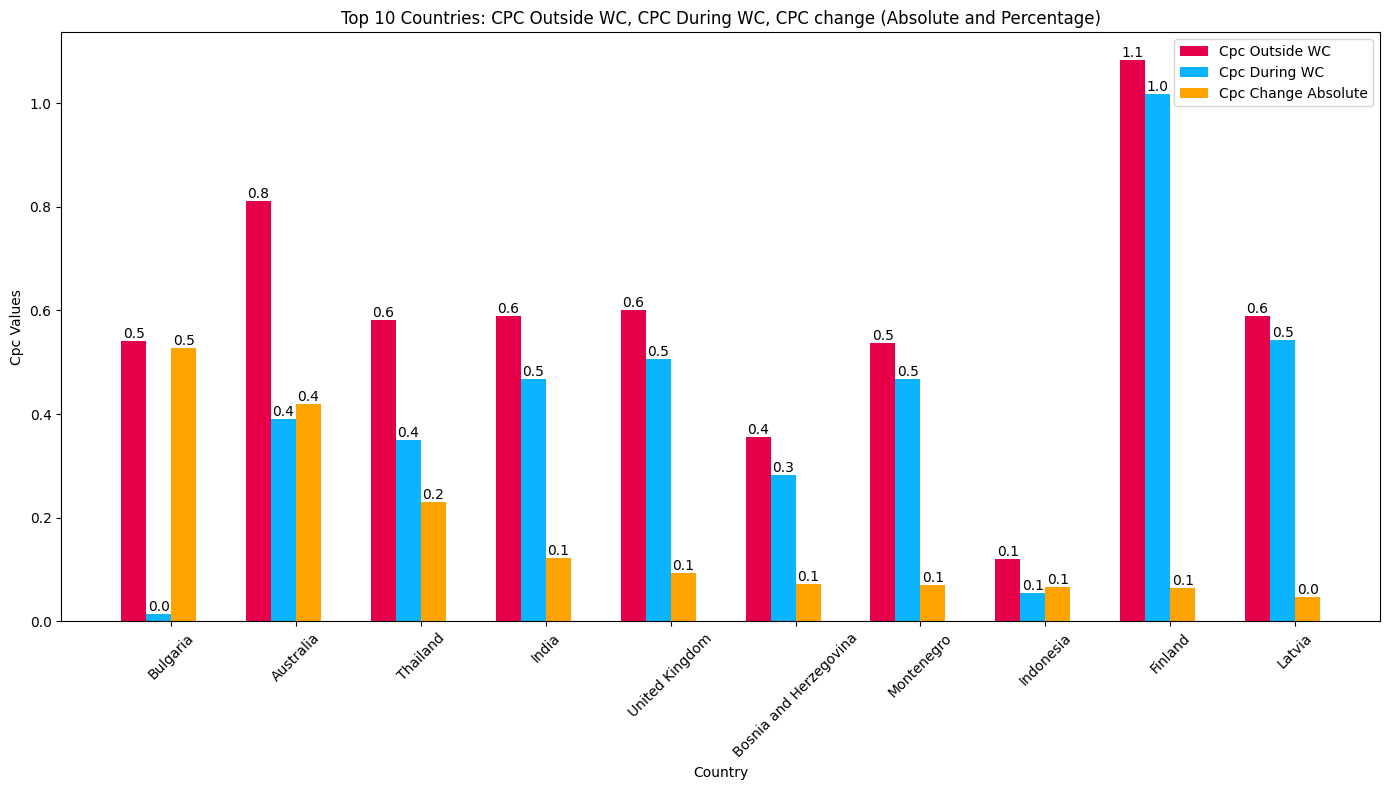

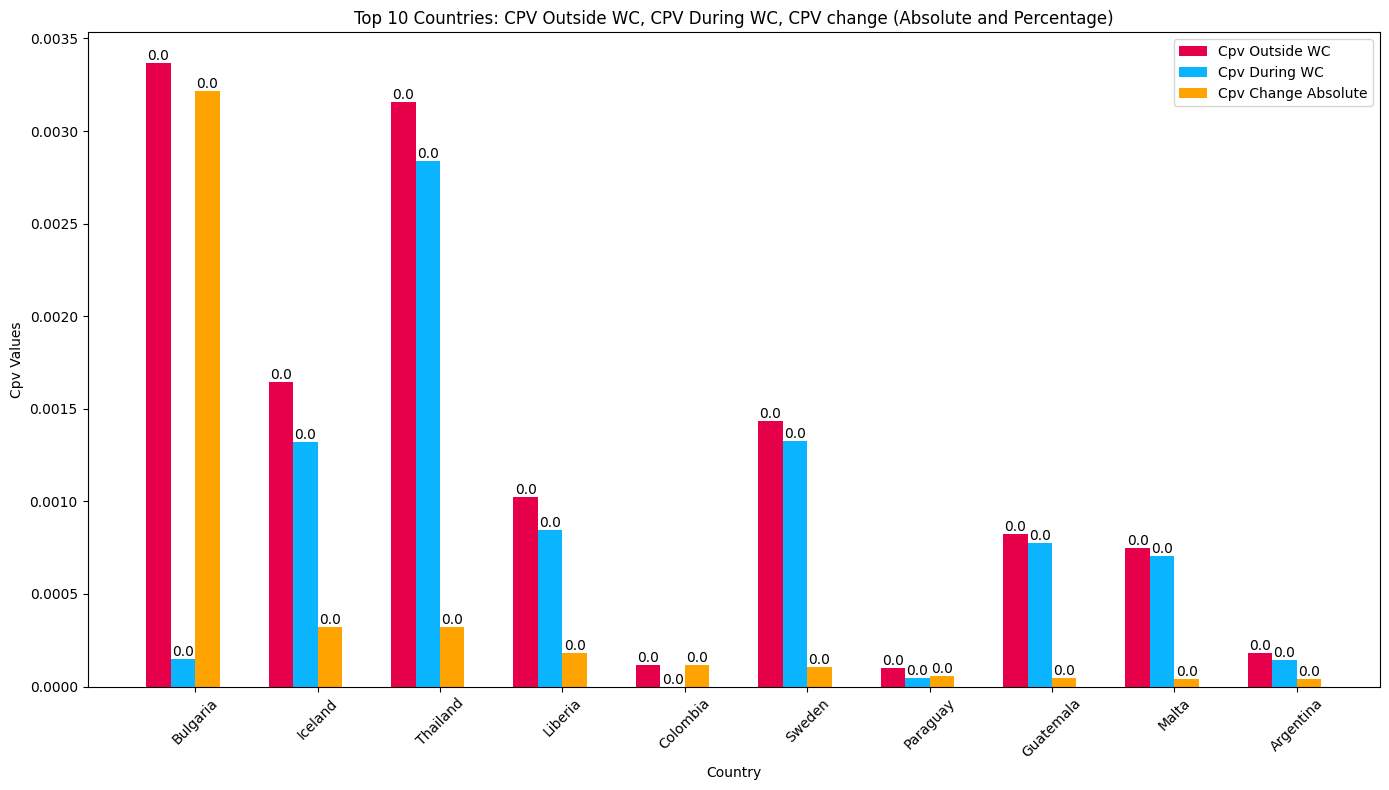

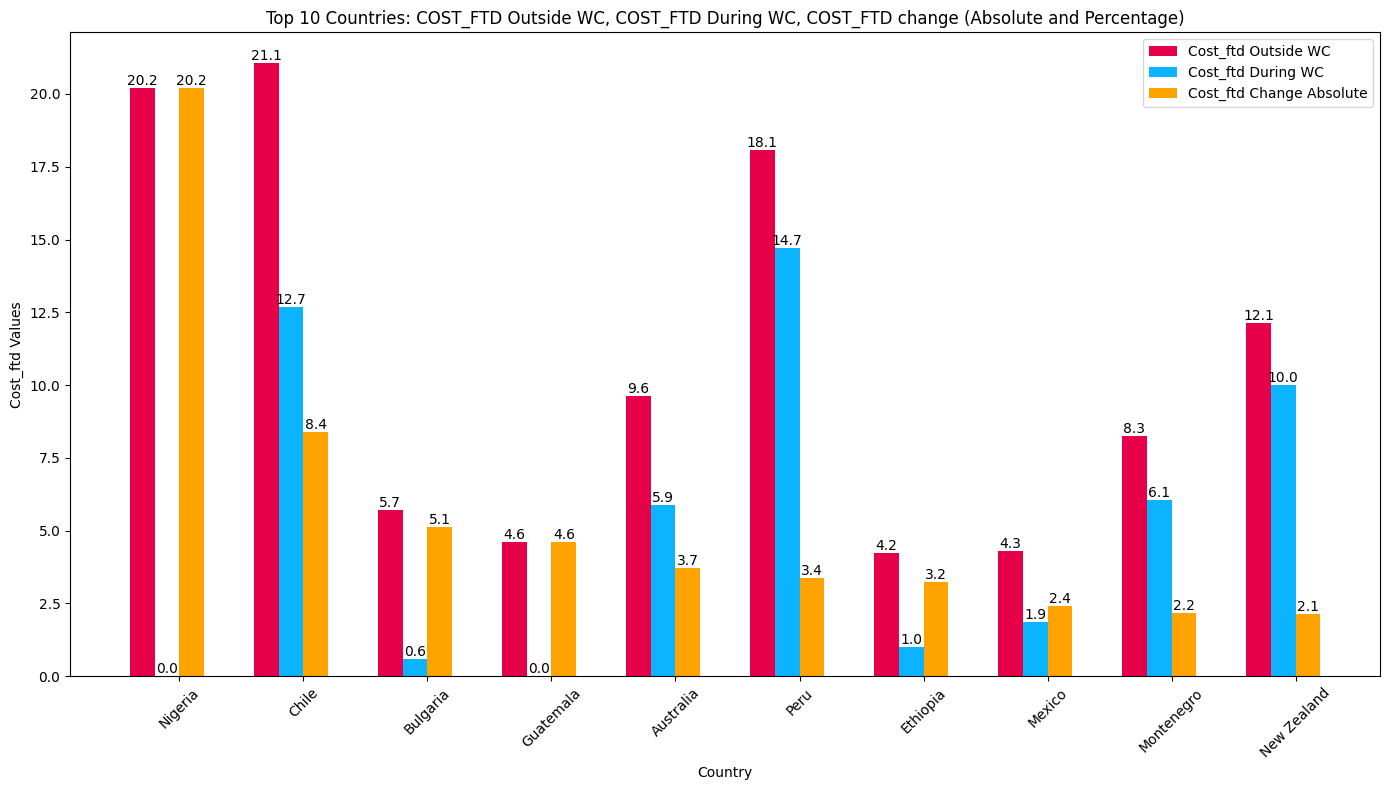

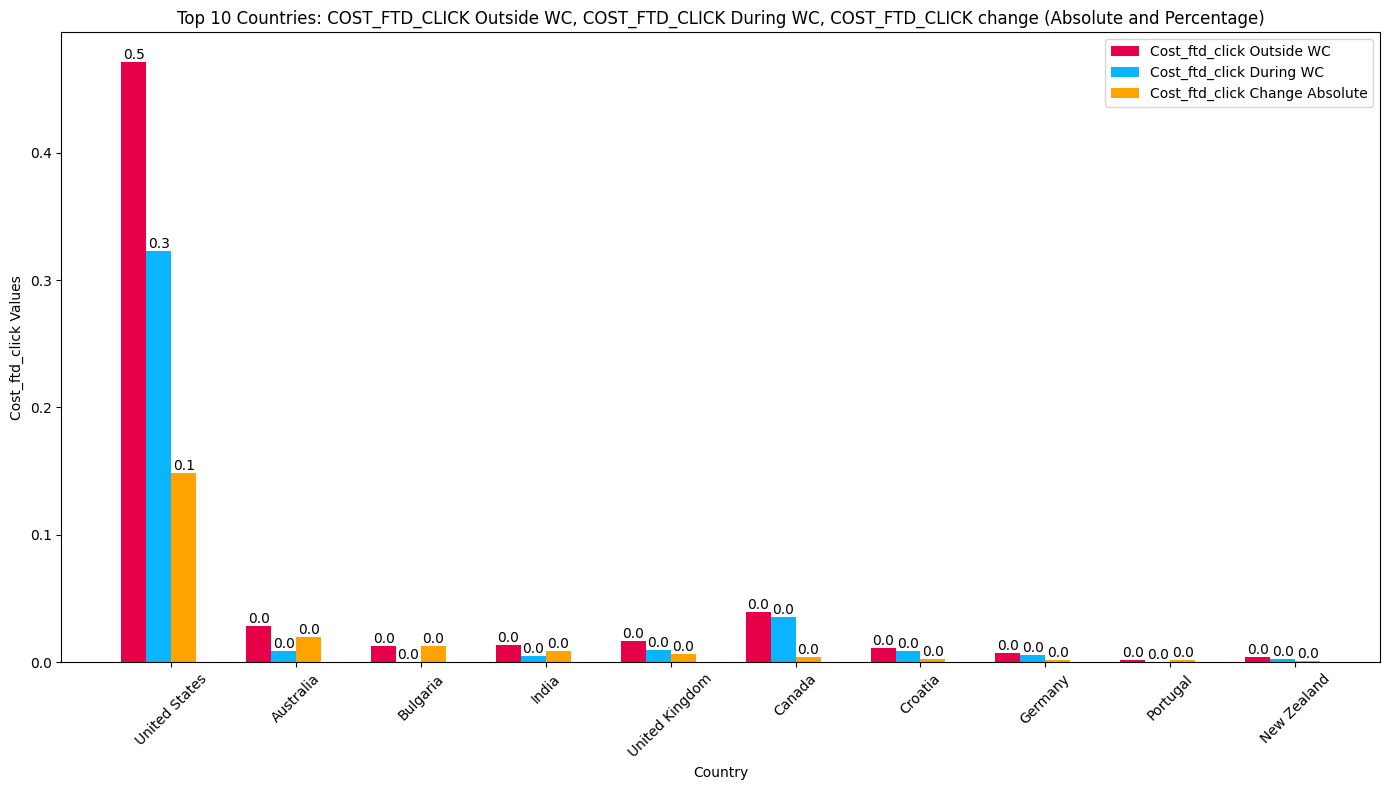

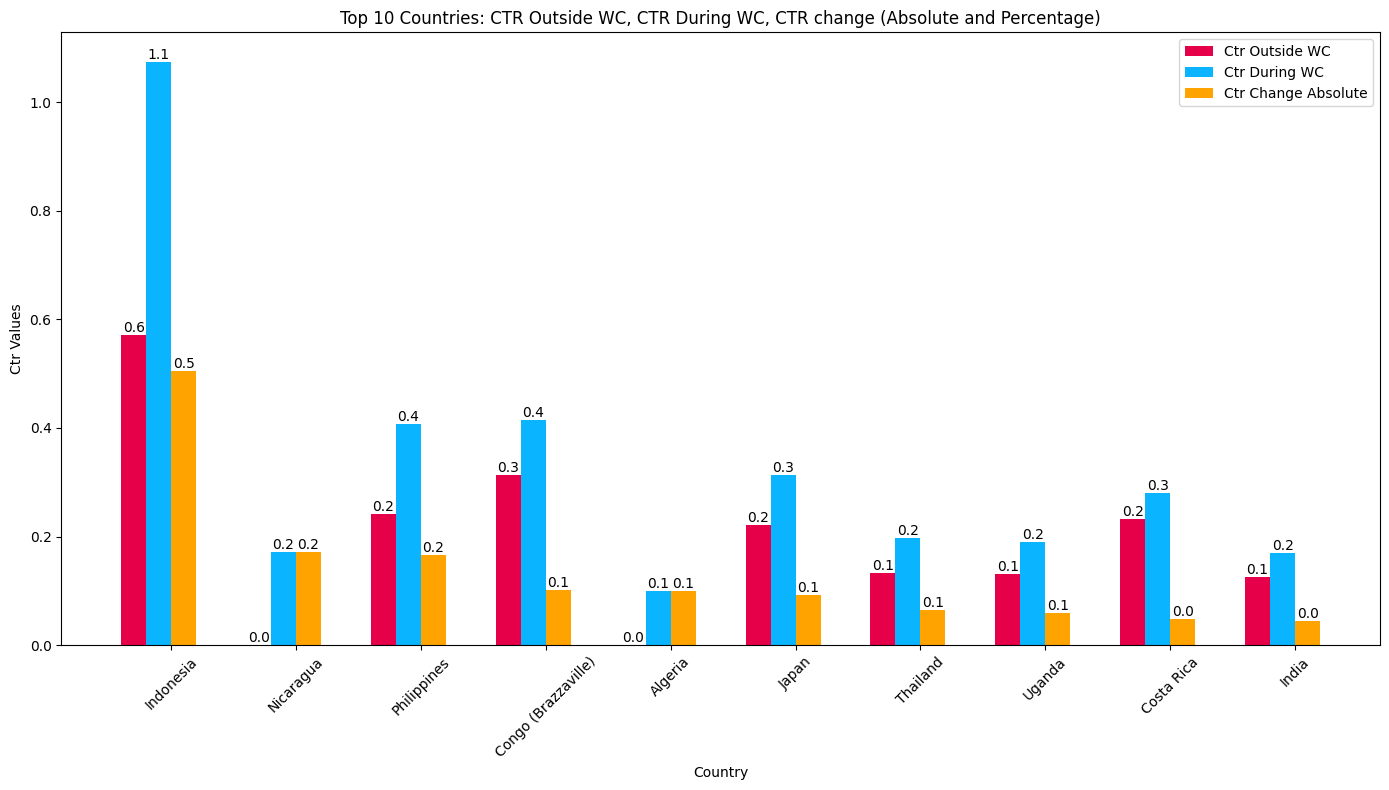

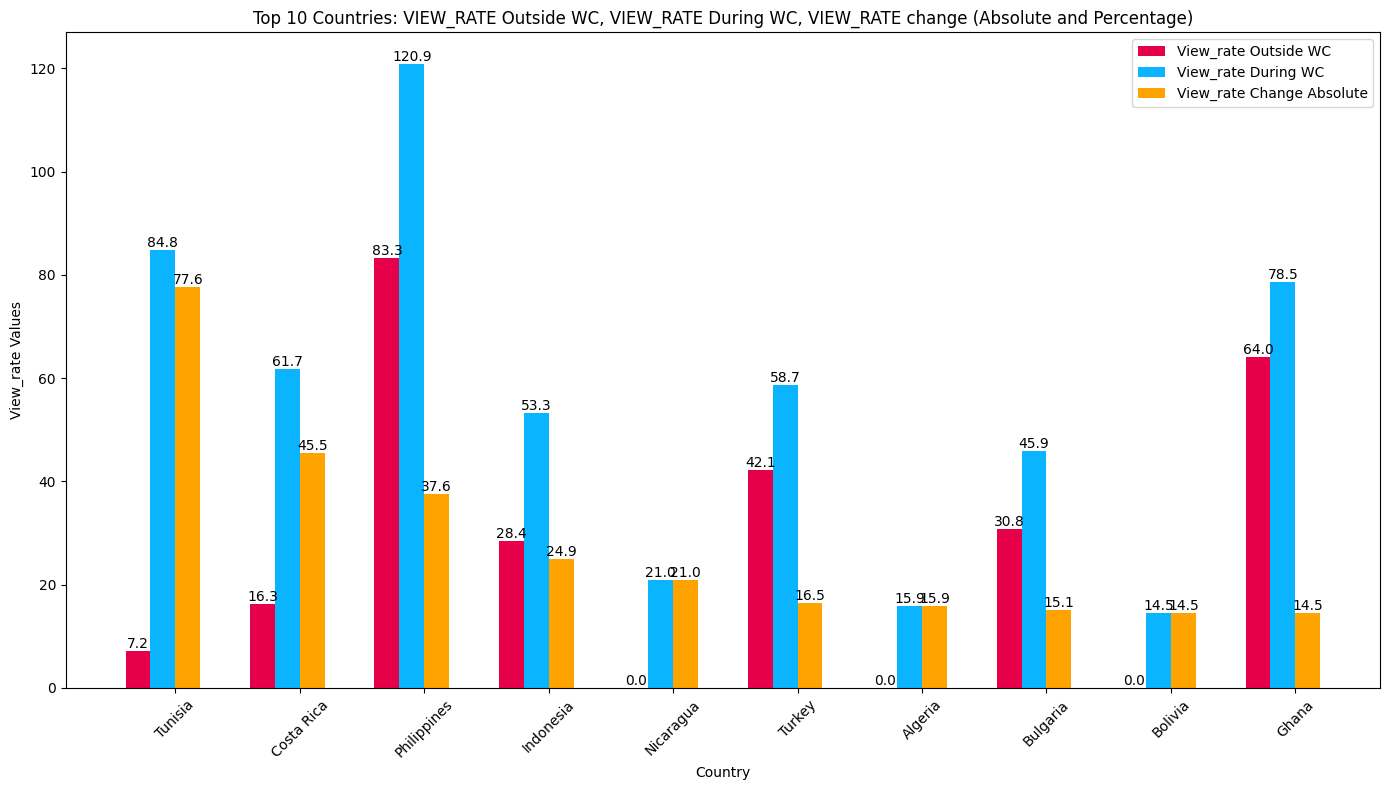

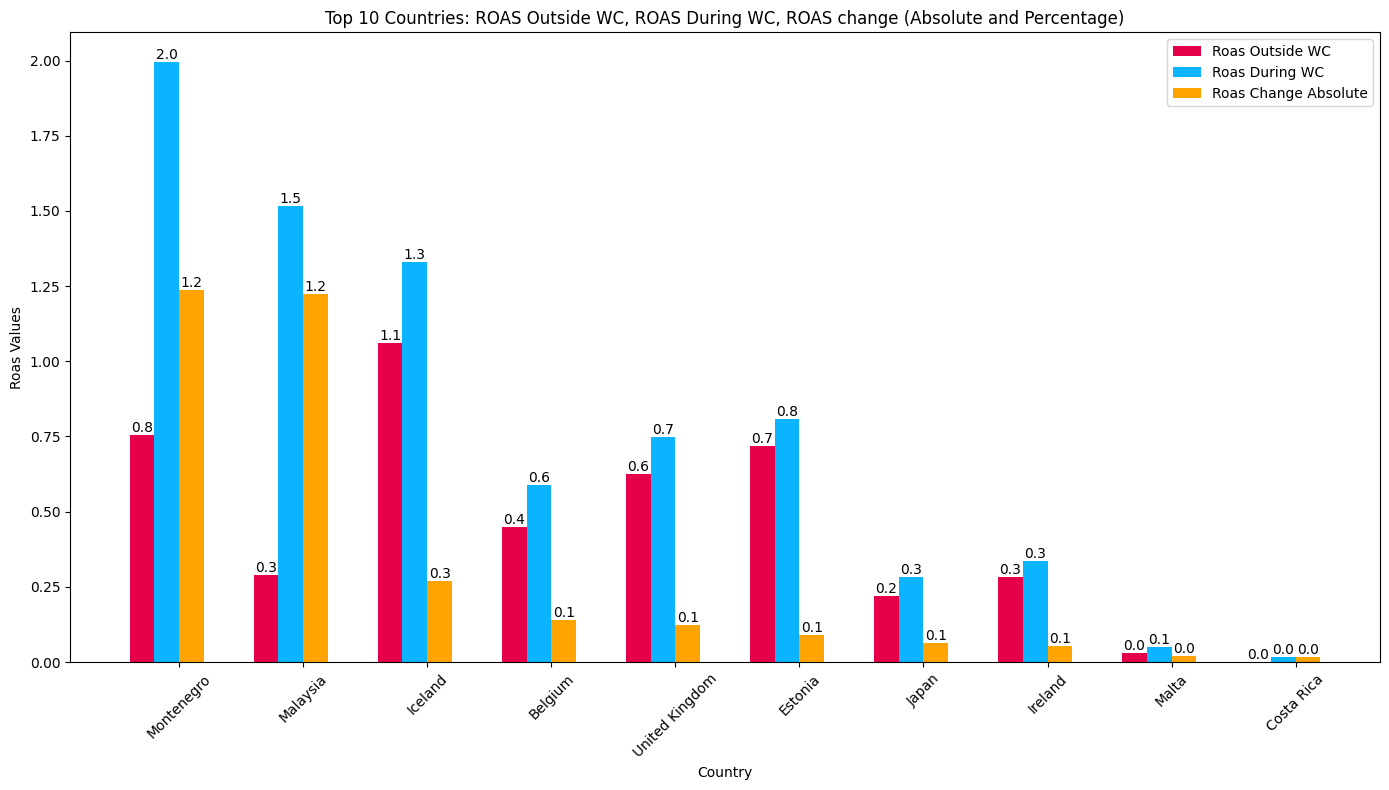

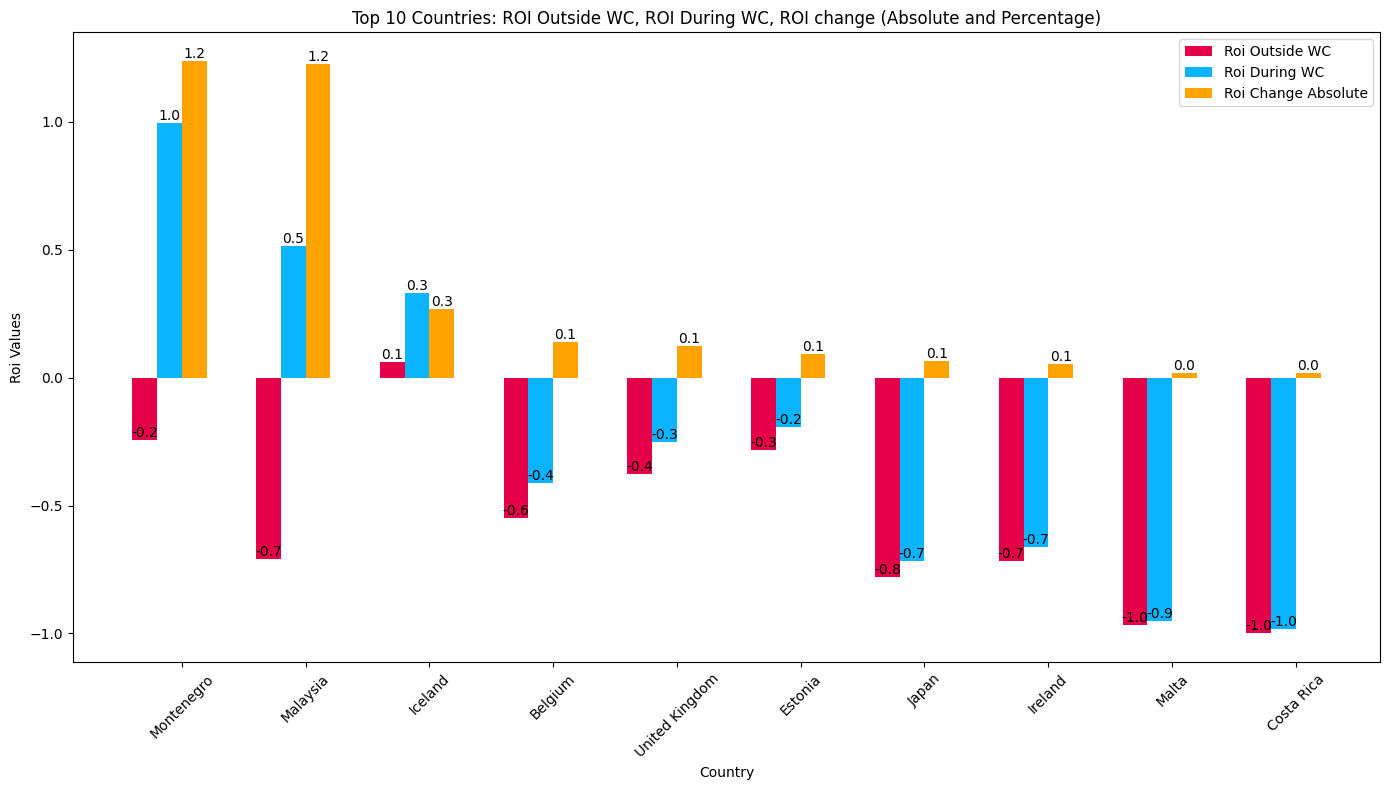

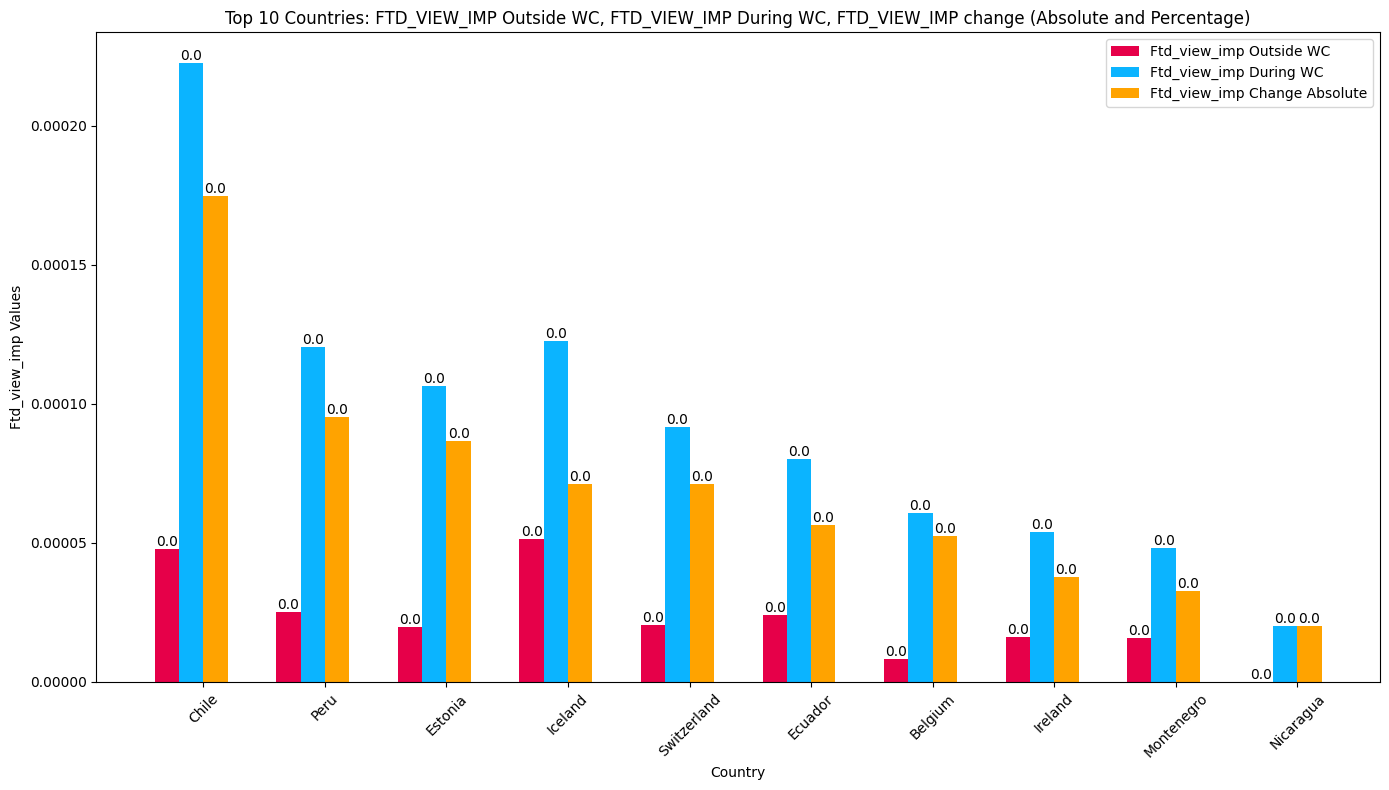

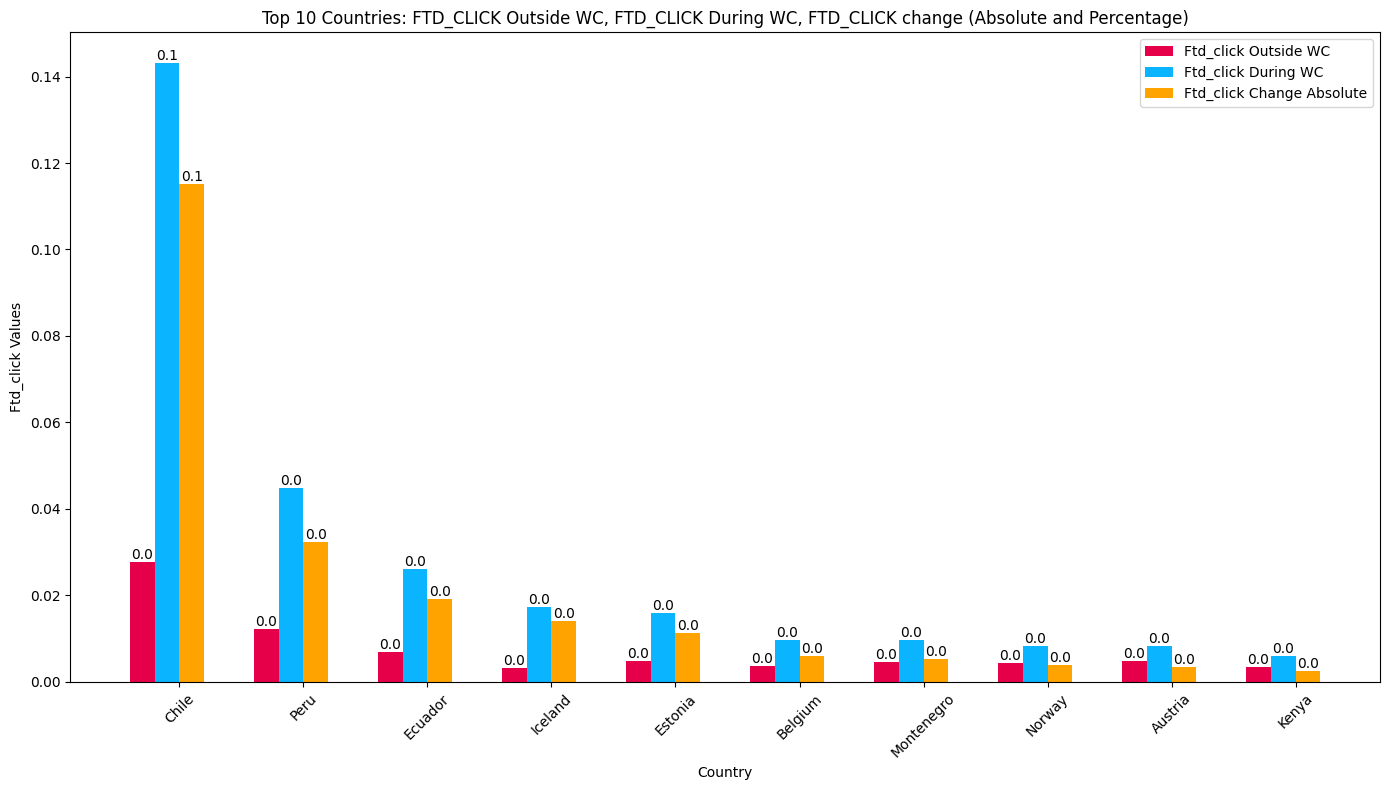

In [160]:
for df, metric in zip(comparisons_df, metrics):
    plot_top_10_comparison_absolut_change(df,metric)
    

### earlier tests


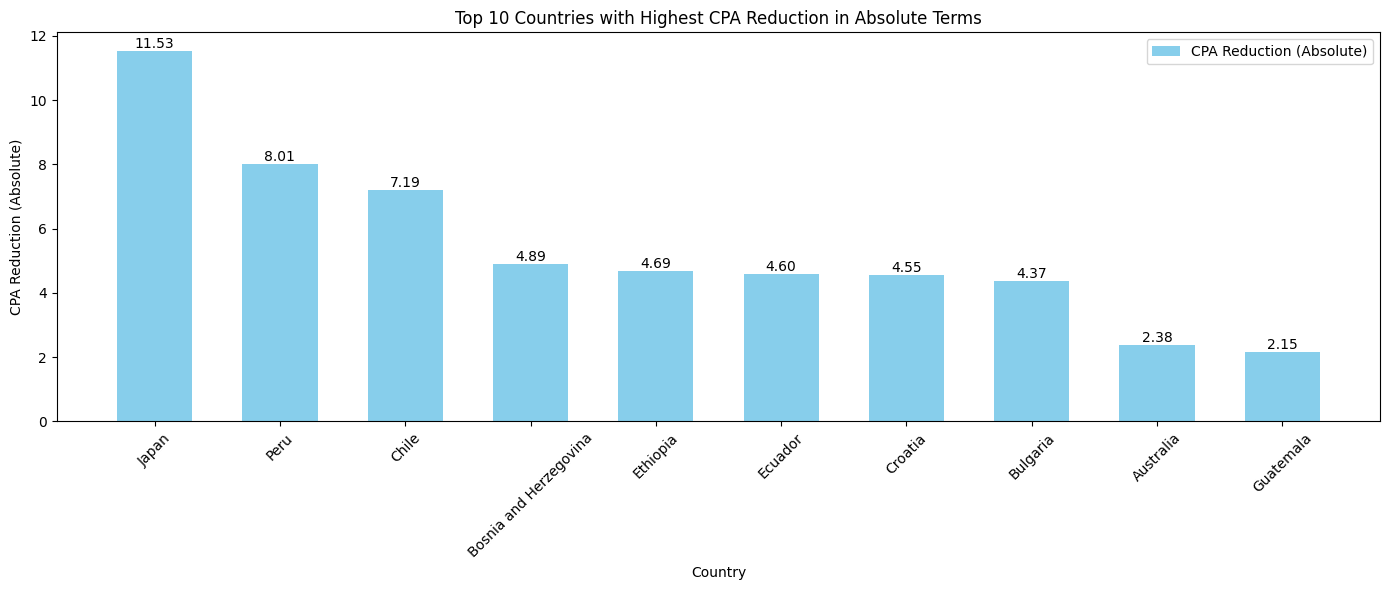

In [61]:
# Select the top 10 countries based on the highest absolute CPA reduction
top_10_reduction_absolute = cpa_comparison.nlargest(10, 'cpa_reduction')

# Plotting absolute CPA reduction
plt.figure(figsize=(14, 6))
bar_width = 0.6
index = range(len(top_10_reduction_absolute))

bars = plt.bar(index, top_10_reduction_absolute['cpa_reduction'], bar_width, color='skyblue', label='CPA Reduction (Absolute)')

# Adding labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')  # ha: horizontal alignment, va: vertical alignment

plt.xlabel('Country')
plt.ylabel('CPA Reduction (Absolute)')
plt.title('Top 10 Countries with Highest CPA Reduction in Absolute Terms')
plt.xticks(index, top_10_reduction_absolute.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


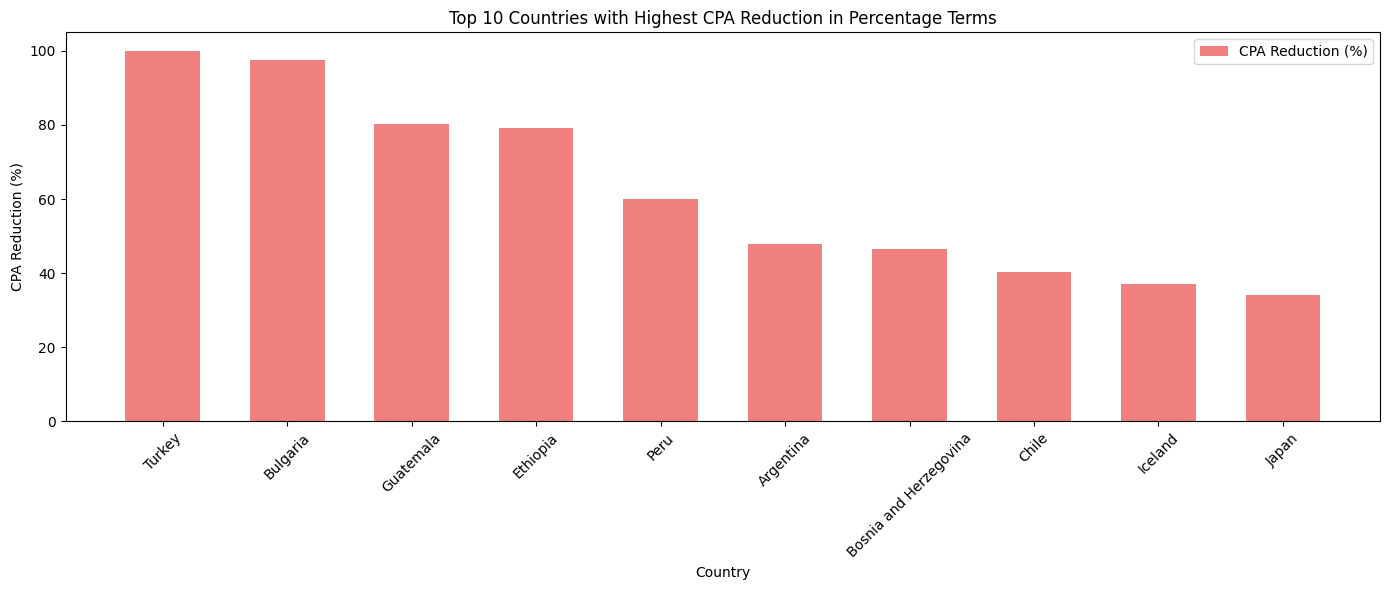

In [58]:
# Plot the top 10 countries based on the highest percentage CPA reduction
top_10_reduction_percent = cpa_comparison.nlargest(10, 'cpa_reduction_pct')

# Plotting percentage CPA reduction
plt.figure(figsize=(14, 6))
index = range(len(top_10_reduction_percent))

plt.bar(index, top_10_reduction_percent['cpa_reduction_pct'], bar_width, color='lightcoral', label='CPA Reduction (%)')

plt.xlabel('Country')
plt.ylabel('CPA Reduction (%)')
plt.title('Top 10 Countries with Highest CPA Reduction in Percentage Terms')
plt.xticks(index, top_10_reduction_percent.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Select the top 10 countries based on the highest absolute CPA reduction
top_10_reduction_absolute = cpa_comparison.nlargest(10, 'cpa_reduction')
# Select the top 10 countries based on the highest percentage CPA reduction
top_10_reduction_percent = cpa_comparison.nlargest(10, 'cpa_reduction_pct')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

bar_width = 0.35
index = range(len(top_10_reduction_absolute))

# Bar positions
bar1_positions = [i for i in index]
bar2_positions = [i + bar_width for i in index]

# Bar plots
bar1 = ax1.bar(bar1_positions, top_10_reduction_absolute['cpa_reduction'], bar_width, label='CPA Reduction (Absolute)', color='skyblue')
bar2 = ax1.bar(bar2_positions, top_10_reduction_percent['cpa_reduction_pct'], bar_width, label='CPA Reduction (%)', color='lightcoral')

# Adding labels to bars
for bar in bar1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment

for bar in bar2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')

# Labels and title
ax1.set_xlabel('Country')
ax1.set_ylabel('CPA Reduction')
ax1.set_title('Top 10 Countries with Highest CPA Reduction (Absolute and Percentage)')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(top_10_reduction_absolute.index, rotation=45)
ax1.legend()

plt.tight_layout()
plt.show()

In [44]:
max_ftd_row = df[df['deposit'] == df['deposit'].max()]

print("Row with maximum ftd:")
max_ftd_row

Row with maximum ftd:


,date_partition,hour_of_day_utc,country_code,os_name,platform_type,imps,viewable_imps,clicks,reg_fin,ftd,...,cpc,cpv,ctr,view_rate,roas,roi,ftd_view_imp,ftd_click,cost_ftd_click,cost_ftd
105892,2022-12-09,14,BR,Android,website,596088.0,402572.0,2366.0,222.0,183.0,...,0.206441,0.001213,0.396921,67.535666,5.022111,4.022111,0.000455,0.077346,0.015967,2.669071


In [111]:
#df.sample(30)